# Ejercicio 7

## 1) 
Escribe una función que tenga como input un vector x con valores distribuidos uniformemente, y unos
parámetros a, b, m y n; y que devuelva como output una matriz cuya primera columna sea y = a + b x
más un término estocástico sacado de una gaussiana con sigma = c + d*x^2; y la segunda columna el
error sigma = m + n*x^2.

In [1]:
generaY = function(x, a, b, m, n){
    sigma = m + n*x^2
    y = a + b*x + rnorm(x, mean = 0, sd = sigma)
    m = cbind(y, sigma)
    return(m)
}

## 2)
Escribe otra función que haga lo mismo que la anterior pero con un parámetro más “c” de tal forma
que haga lo mismo pero con un modelo y = a + b x + c x^2.

In [2]:
generaY2 = function(x, a, b, c, m, n){
    sigma = m + n*x^2
    y = a + b*x + c*x^2 + rnorm(x, mean = 0, sd = sigma)
    m = cbind(y, sigma)
    return(m)
}

## 3) 
Usando como valores a = 1, b = 2, m = 0.1 y n = 0.04 para el modelo de la primera función: calcula los
parámetros para las que el likelihood es máximo asumiendo un modelo con dos parámetros y = a + b x.
Calcula el valor del chi2 y calcula el nivel de confianza con el que rechazaríamos este ajuste.

In [3]:
# Creamos la función para hallar los parámetros maximizando el likelyhood                  
parMaxLike = function(x,ys){
    y = ys[,1]
    sigma = ys[,2]
    n = length(y)
    X = cbind(rep(1, n), x)
    CovY = diag(x = sigma, nrow = n, ncol = n)
    theta = solve(t(X) %*% solve(CovY) %*% X) %*% (t(X) %*% solve(CovY)) %*% y
    return(theta)
}

In [4]:
N = 100
a = 1
b = 2
c = 0.2
m = 0.1
n = 0.04

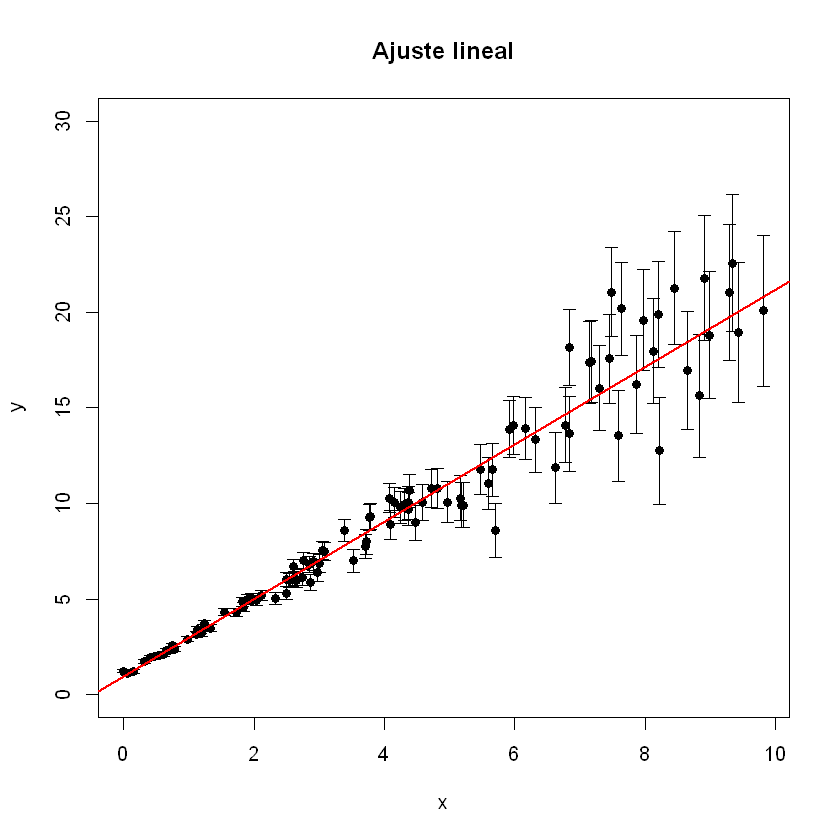

In [5]:
# Generamos los datos
x = runif(N, 0, 10)
ysig = generaY(x,a,b,m,n)

# Hacemos el ajuste
theta = parMaxLike(x, ysig)

plot(x, ysig[,1], ylim = c(0,30), pch = 16,
    ylab = "y", xlab = "x",
    main = "Ajuste lineal")
arrows(x0 = x, y0 = ysig[,1]-ysig[,2], x1 = x, y1 = ysig[,1]+ysig[,2],
       code = 3, angle = 90, length = 0.05, col = "black")
abline(theta, col = "red", lwd = 2)

In [6]:
# Calculamos chi^2
chi_square = function(x,ys,theta){
    y = ys[,1]
    sigma = ys[,2]
    n = length(y)
    X = cbind(rep(1, n), x)
    s = (y-X %*% theta)/sigma
    return(sum(s^2))
} 

chi = chi_square(x,ysig,theta)
chi

[1] 99.08523

In [7]:
pchisq(chi, N-2, lower.tail = FALSE)

[1] 0.4503288

## 4) 
Repite el paso anterior con el mismo modelo pero usando la segunda función.

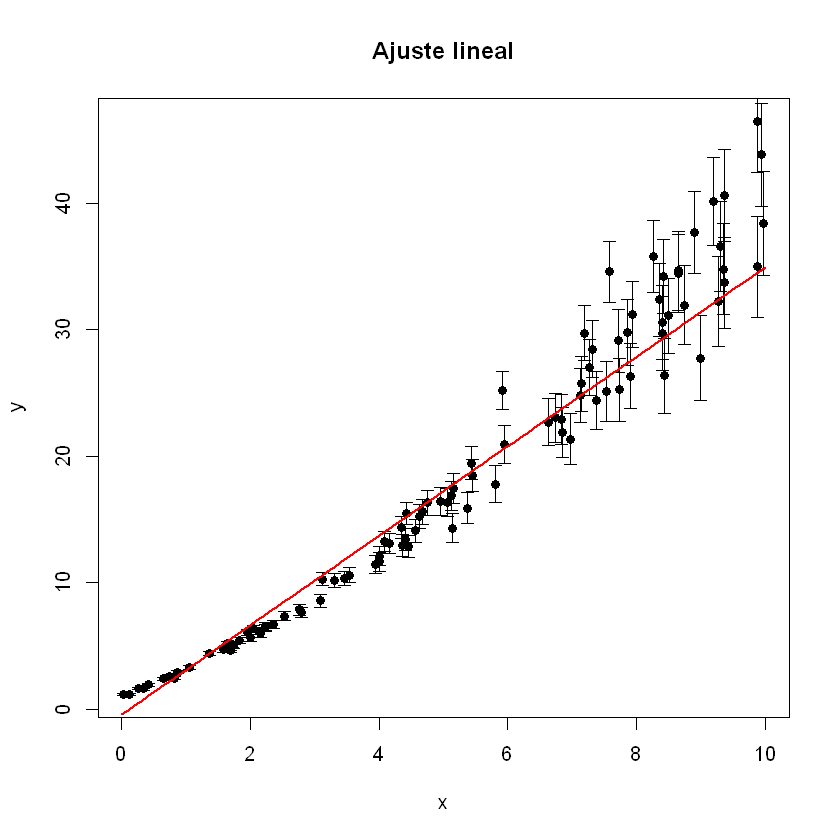

In [8]:
# Generamos los datos
x = runif(N, 0, 10)
ysig2 = generaY2(x,a,b,c,m,n)

# Hacemos el ajuste
theta2 = parMaxLike(x, ysig2)

plot(x, ysig2[,1], pch = 16,
    ylab = "y", xlab = "x",
    main = "Ajuste lineal")
arrows(x0 = x, y0 = ysig2[,1]-ysig2[,2], x1 = x, y1 = ysig2[,1]+ysig2[,2],
       code = 3, angle = 90, length = 0.05, col = "black")
# Repersentación del ajuste
xteo = seq(0,10, by = 0.1)
yteo = theta2[1] + theta2[2]*xteo
lines(xteo, yteo, col = "red", lwd = 2)

In [9]:
# Calculamos chi^2
chi_square2 = function(x,ys,theta){
    y = ys[,1]
    sigma = ys[,2]
    n = length(y)
    X = cbind(rep(1, n), x)
    s = (y-X %*% theta)/sigma
    return(sum(s^2))
} 

chi2 = chi_square2(x,ysig2,theta2)
chi2

[1] 1029.269

In [10]:
pchisq(chi2, N-3, lower.tail = FALSE)

[1] 1.210832e-155

## 5)
Usando la primera de las funciones anteriores con los valores dados en 3) calcula el valor del likelihood
ratio “q” para un modelo con 2 y 3 parámetros. ¿Con qué confidence level podemos aceptar H0?
Comenta el resultado: ¿qué modelo es mejor el primero o el segundo?.

In [11]:
q1 = 2*log(sqrt(2*pi))*sum(log(ysig[,2]))+chi
q2 = 2*log(sqrt(2*pi))*sum(log(ysig2[,2]))+chi2
qr = q1 - q2
pchisq(qr,3-2, lower.tail=FALSE)

[1] 1

??????